In [ ]:
# Rossman Store Sales Prediction

# Thank you for your feedback of our last week submission about EDA and this week we start modeling and also adding the some new understanding for the EDA part

In [7]:
## below are the previous code about data preprocessing :
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
store = pd.read_csv('../../data/store.csv')
train = pd.read_csv('../../data/train.csv', index_col='Date', parse_dates=True)
test = pd.read_csv('../../data/test.csv')
train['Year'] = train.index.year
train['Month'] = train.index.month
train['Day'] = train.index.day
train['WeekofYear'] = train.index.isocalendar().week

train['SalesPerCustomer'] = train['Sales'] / train['Customers']
train_store_closed = train[(train.Open == 0)]
store['CompetitionDistance'].fillna(store['CompetitionDistance'].median(), inplace=True)
store.fillna(0, inplace=True)
store.isnull().sum().sum()
test.fillna(1, inplace=True)
test.isnull().sum().sum()


train = train[(train["Open"] != 0) & (train['Sales'] != 0)]
train=train.drop(columns=train[(train.Open == 1) & (train.Sales == 0)].index)
train.Customers.describe()

train_store = pd.merge(train, store, how = 'inner', on = 'Store')

print("In total: ", train_store.shape)
train_store.head(1000)



C:\Users\Dsy\AppData\Local\Temp\ipykernel_22132\1428581608.py:7: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv('../../data/train.csv', index_col='Date', parse_dates=True)


In total:  (844338, 22)


,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,...,SalesPerCustomer,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,5263,555,1,1,0,1,2015,7,...,9.482883,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,4,5020,546,1,1,0,1,2015,7,...,9.194139,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1,3,4782,523,1,1,0,1,2015,7,...,9.143403,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
3,1,2,5011,560,1,1,0,1,2015,7,...,8.948214,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
4,1,1,6102,612,1,1,0,1,2015,7,...,9.970588,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2,5,4655,560,1,1,0,0,2014,11,...,8.312500,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
996,2,4,5009,624,1,1,0,0,2014,11,...,8.027244,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
997,2,3,6818,776,1,1,0,0,2014,11,...,8.786082,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
998,2,2,5651,601,1,1,0,0,2014,11,...,9.402662,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"


# adding new EDA part and Time Series Analysis

#### Store types
In this section we will closely look at different levels of StoreType and how the main metric Sales is distributed among them.

In [11]:
 train_store.groupby('StoreType')['Sales'].describe()

,count,mean,std,min,25%,50%,75%,max
StoreType,,,,,,,,
a,457042.0,6925.697986,3277.351589,46.0,4695.25,6285.0,8406.00,41551.0
b,15560.0,10233.380141,5155.729868,1252.0,6345.75,9130.0,13184.25,38722.0
c,112968.0,6933.126425,2896.958579,133.0,4916.00,6408.0,8349.25,31448.0
d,258768.0,6822.300064,2556.401455,538.0,5050.00,6395.0,8123.25,38037.0


StoreType B has the highest average of Sales among all others, however we have much less data for it.

In [14]:
train_store.groupby('StoreType')[['Customers', 'Sales']].sum()


,Customers,Sales
StoreType,,
a,363541431,3165334859
b,31465616,159231395
c,92129705,783221426
d,156904995,1765392943


Clearly stores of type A. StoreType D goes on the second place in both Sales and Customers.

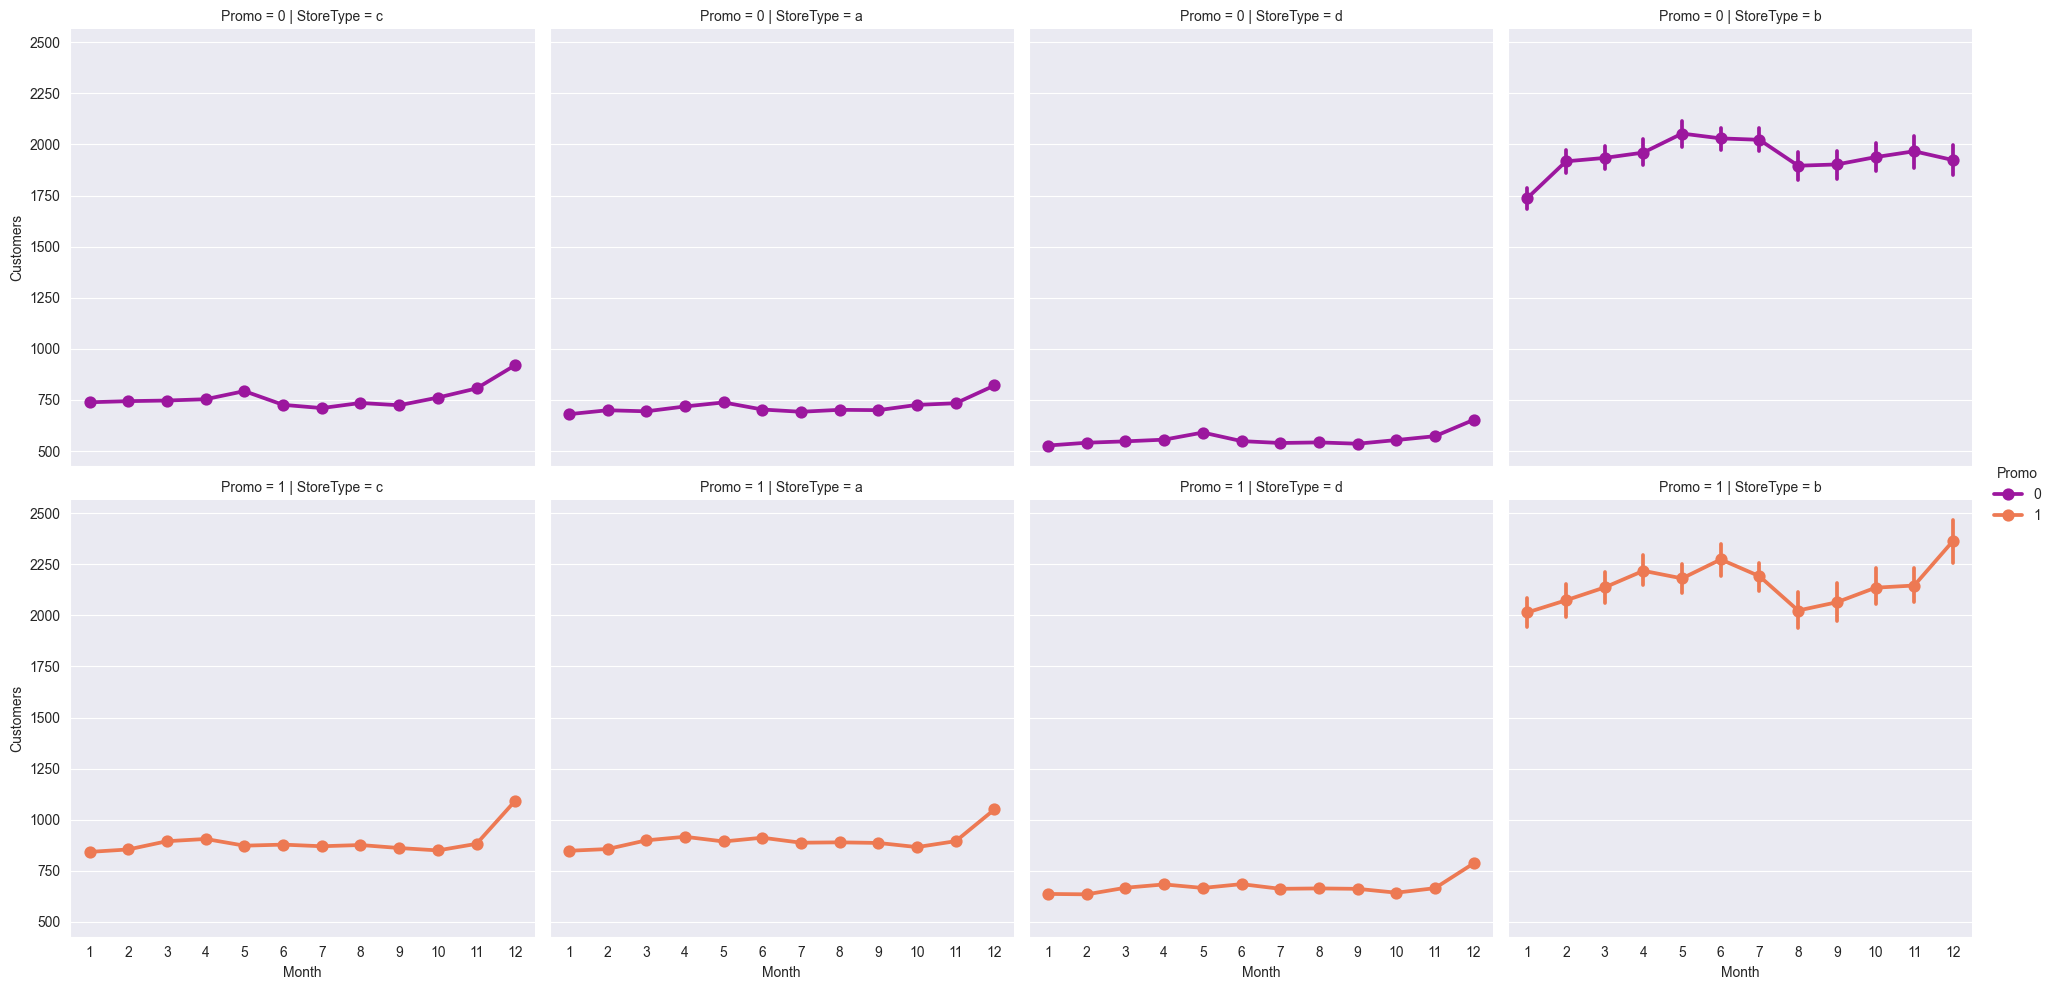

In [16]:
import seaborn as sns

sns.catplot(
    data=train_store,
    x='Month',
    y='Customers',
    col='StoreType',    # Creates separate plots for each StoreType
    palette='plasma',   # Use the plasma color palette
    hue='Promo',        # Differentiates the data by Promo within each StoreType
    row='Promo',        # Creates separate rows for each Promo status
    kind='point'        # Use point plot for visualization
)


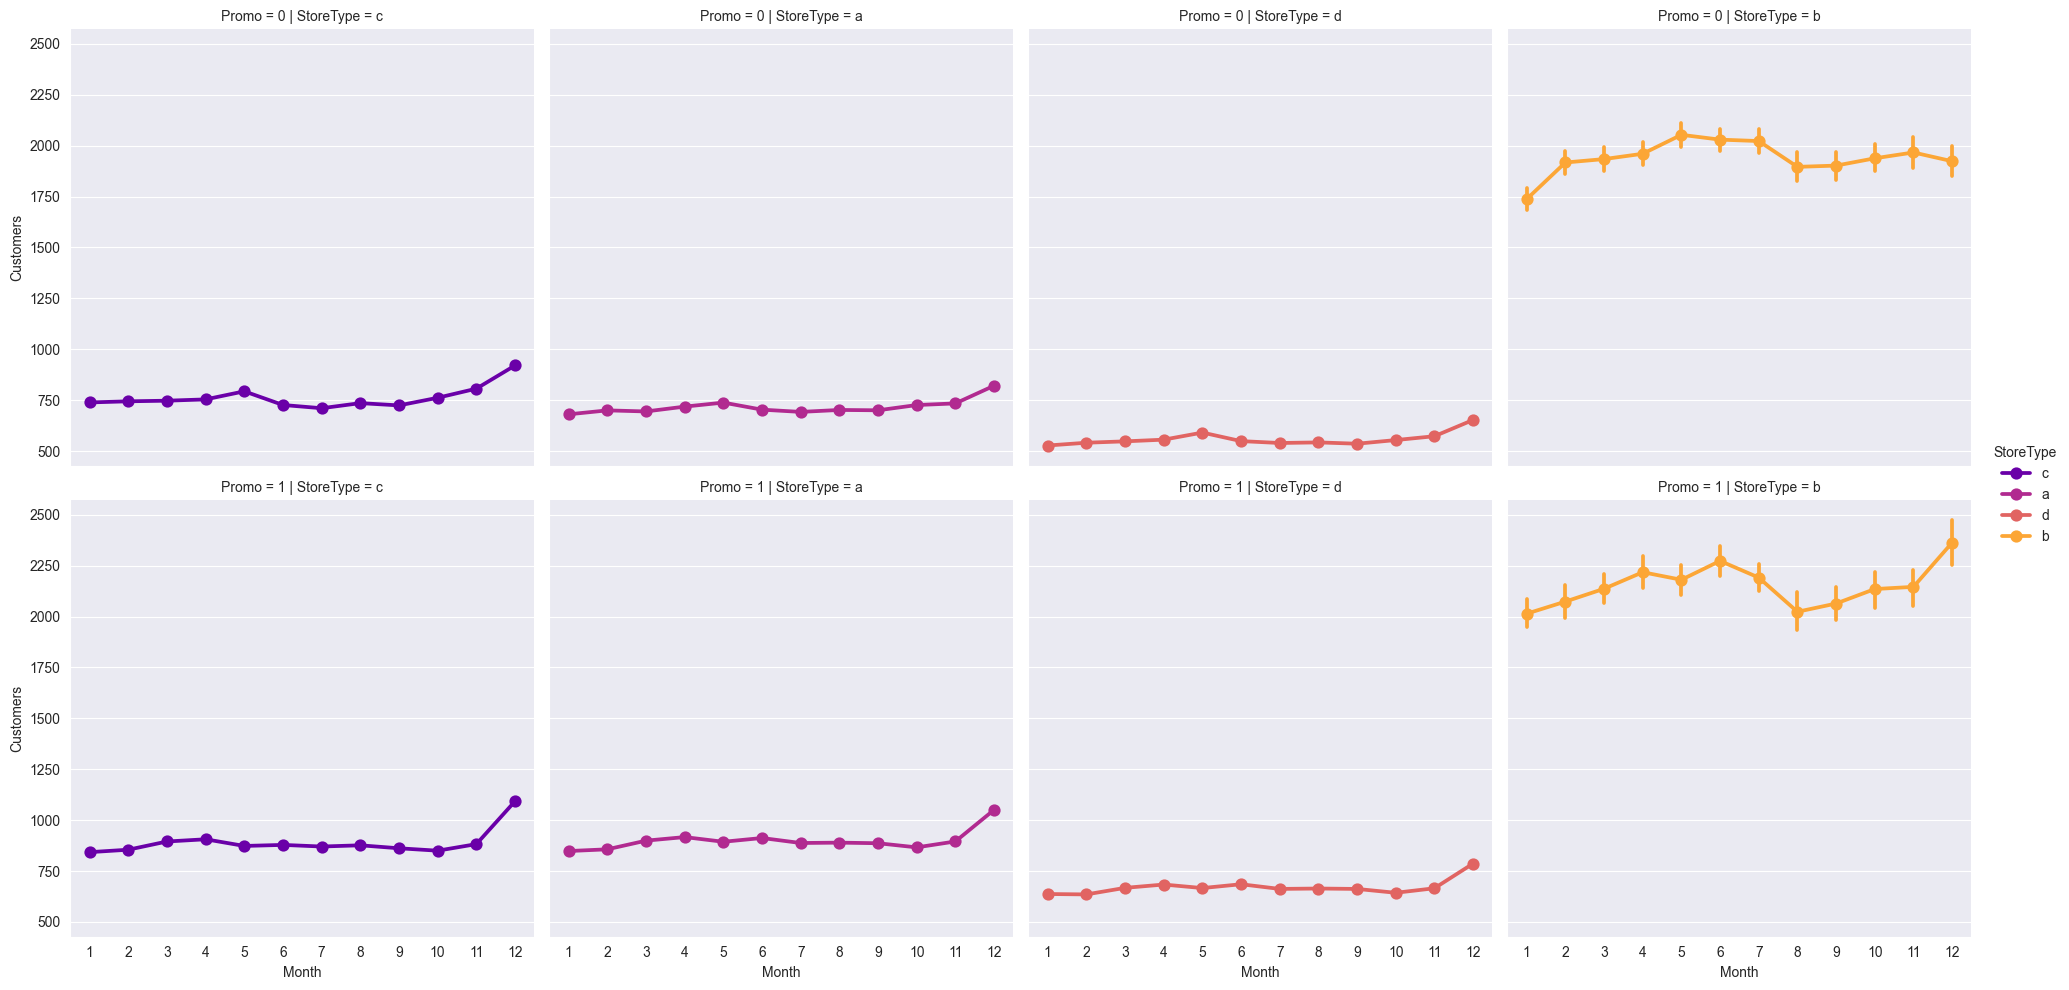

In [18]:

sns.catplot(
    data=train_store,
    x='Month',
    y='Customers',
    col='StoreType',   # Create separate plots for each StoreType
    palette='plasma',  # Use the plasma color palette
    hue='StoreType',   # Differentiate by StoreType within each plot
    row='Promo',       # Create separate rows for Promo status
    kind='point'       # Use point plot to show trends over time
)


All store types follow the same trend but at different scales depending on the presence of the (first) promotion Promo and StoreType itself (case for B).

###### Already at this point, we can see that Sales escalate towards Christmas holidays. But we'll talk about seasonalities and trends later in the Time Series Analysis section.

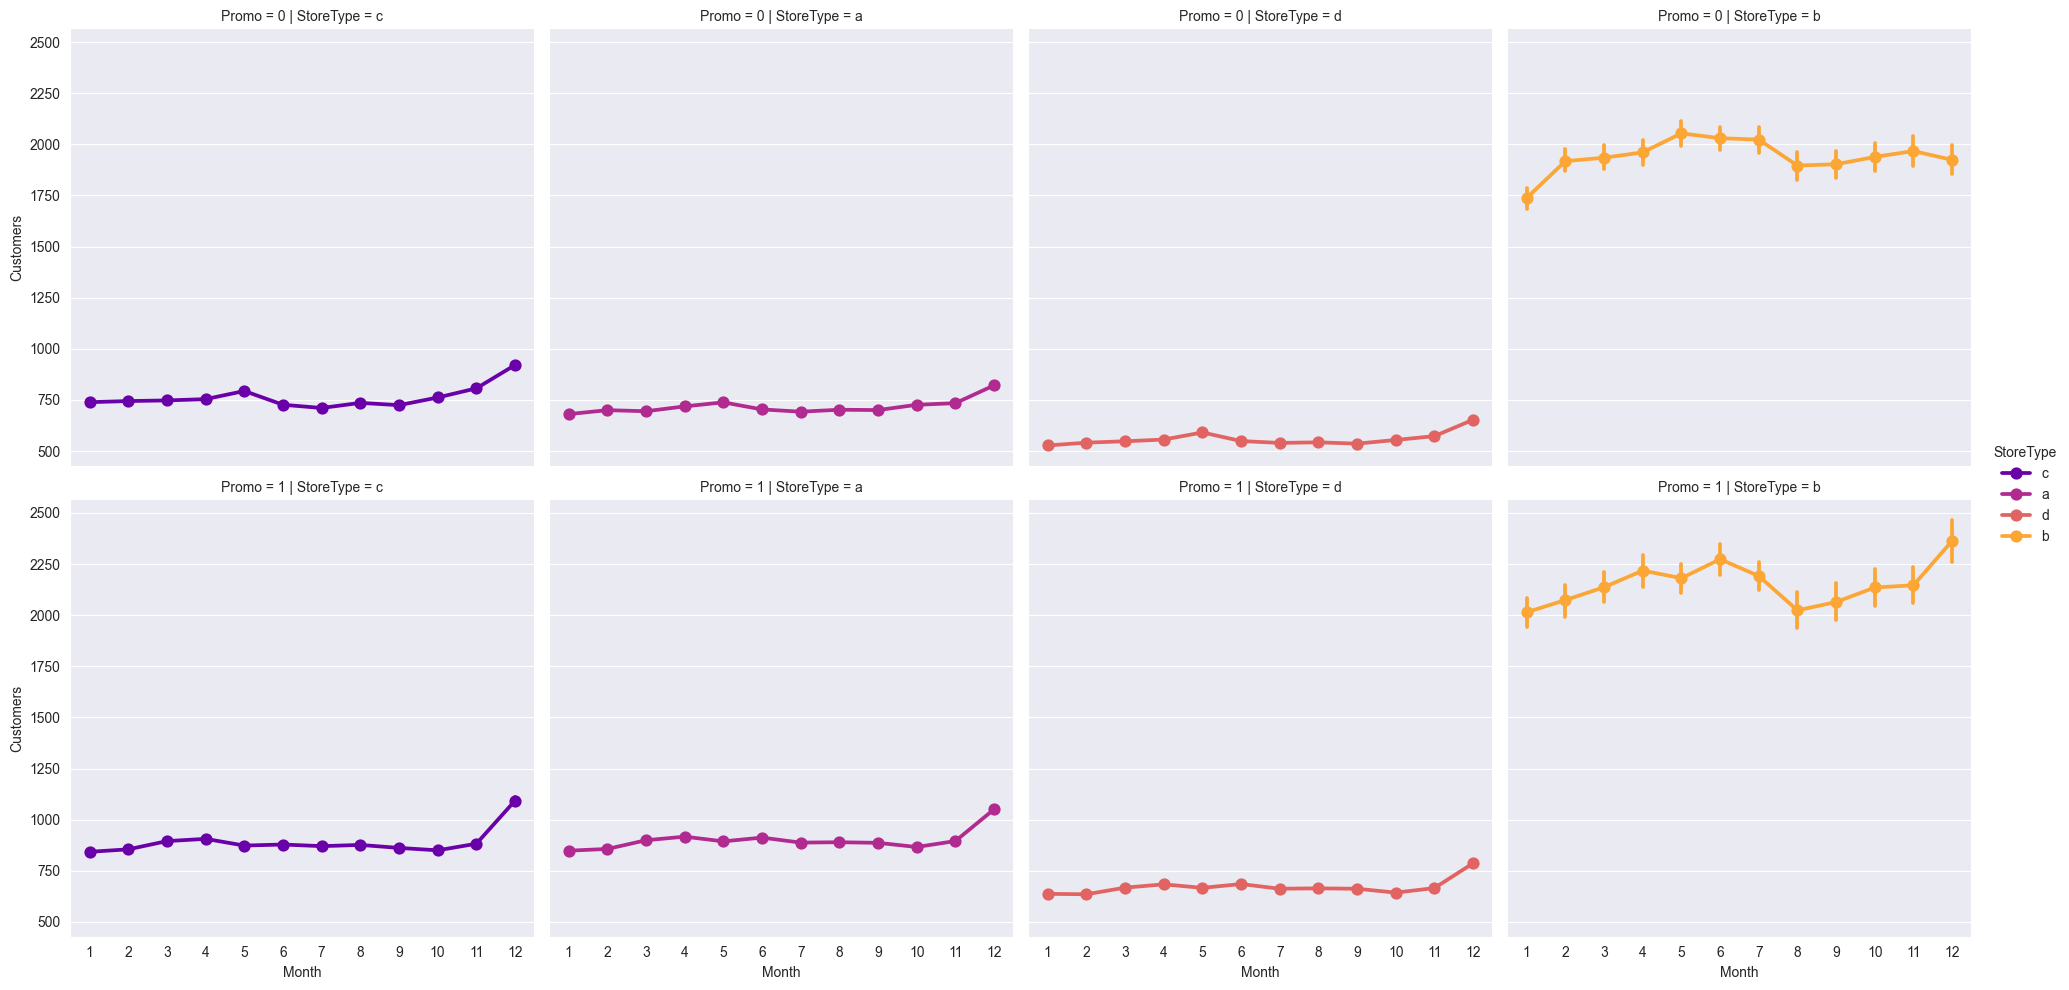

In [17]:
# sale per customer trends
sns.factorplot(data = train_store, x = 'Month', y = "SalePerCustomer",
               col = 'StoreType', # per store type in cols
               palette = 'plasma',
               hue = 'StoreType',
               row = 'Promo', # per promo in the store in rows
               color = c)

Eventhough the plots above showed StoreType B as the most selling and performant one, in reality it is not true. The highest SalePerCustomer amount is observed at the StoreType D.

Low SalePerCustomer amount for StoreType B describes its Buyer Cart: there are a lot of people who shop essentially for "small" things (or in a little quantity). Plus we saw that overall this StoreType generated the least amount of sales and customers over the period.

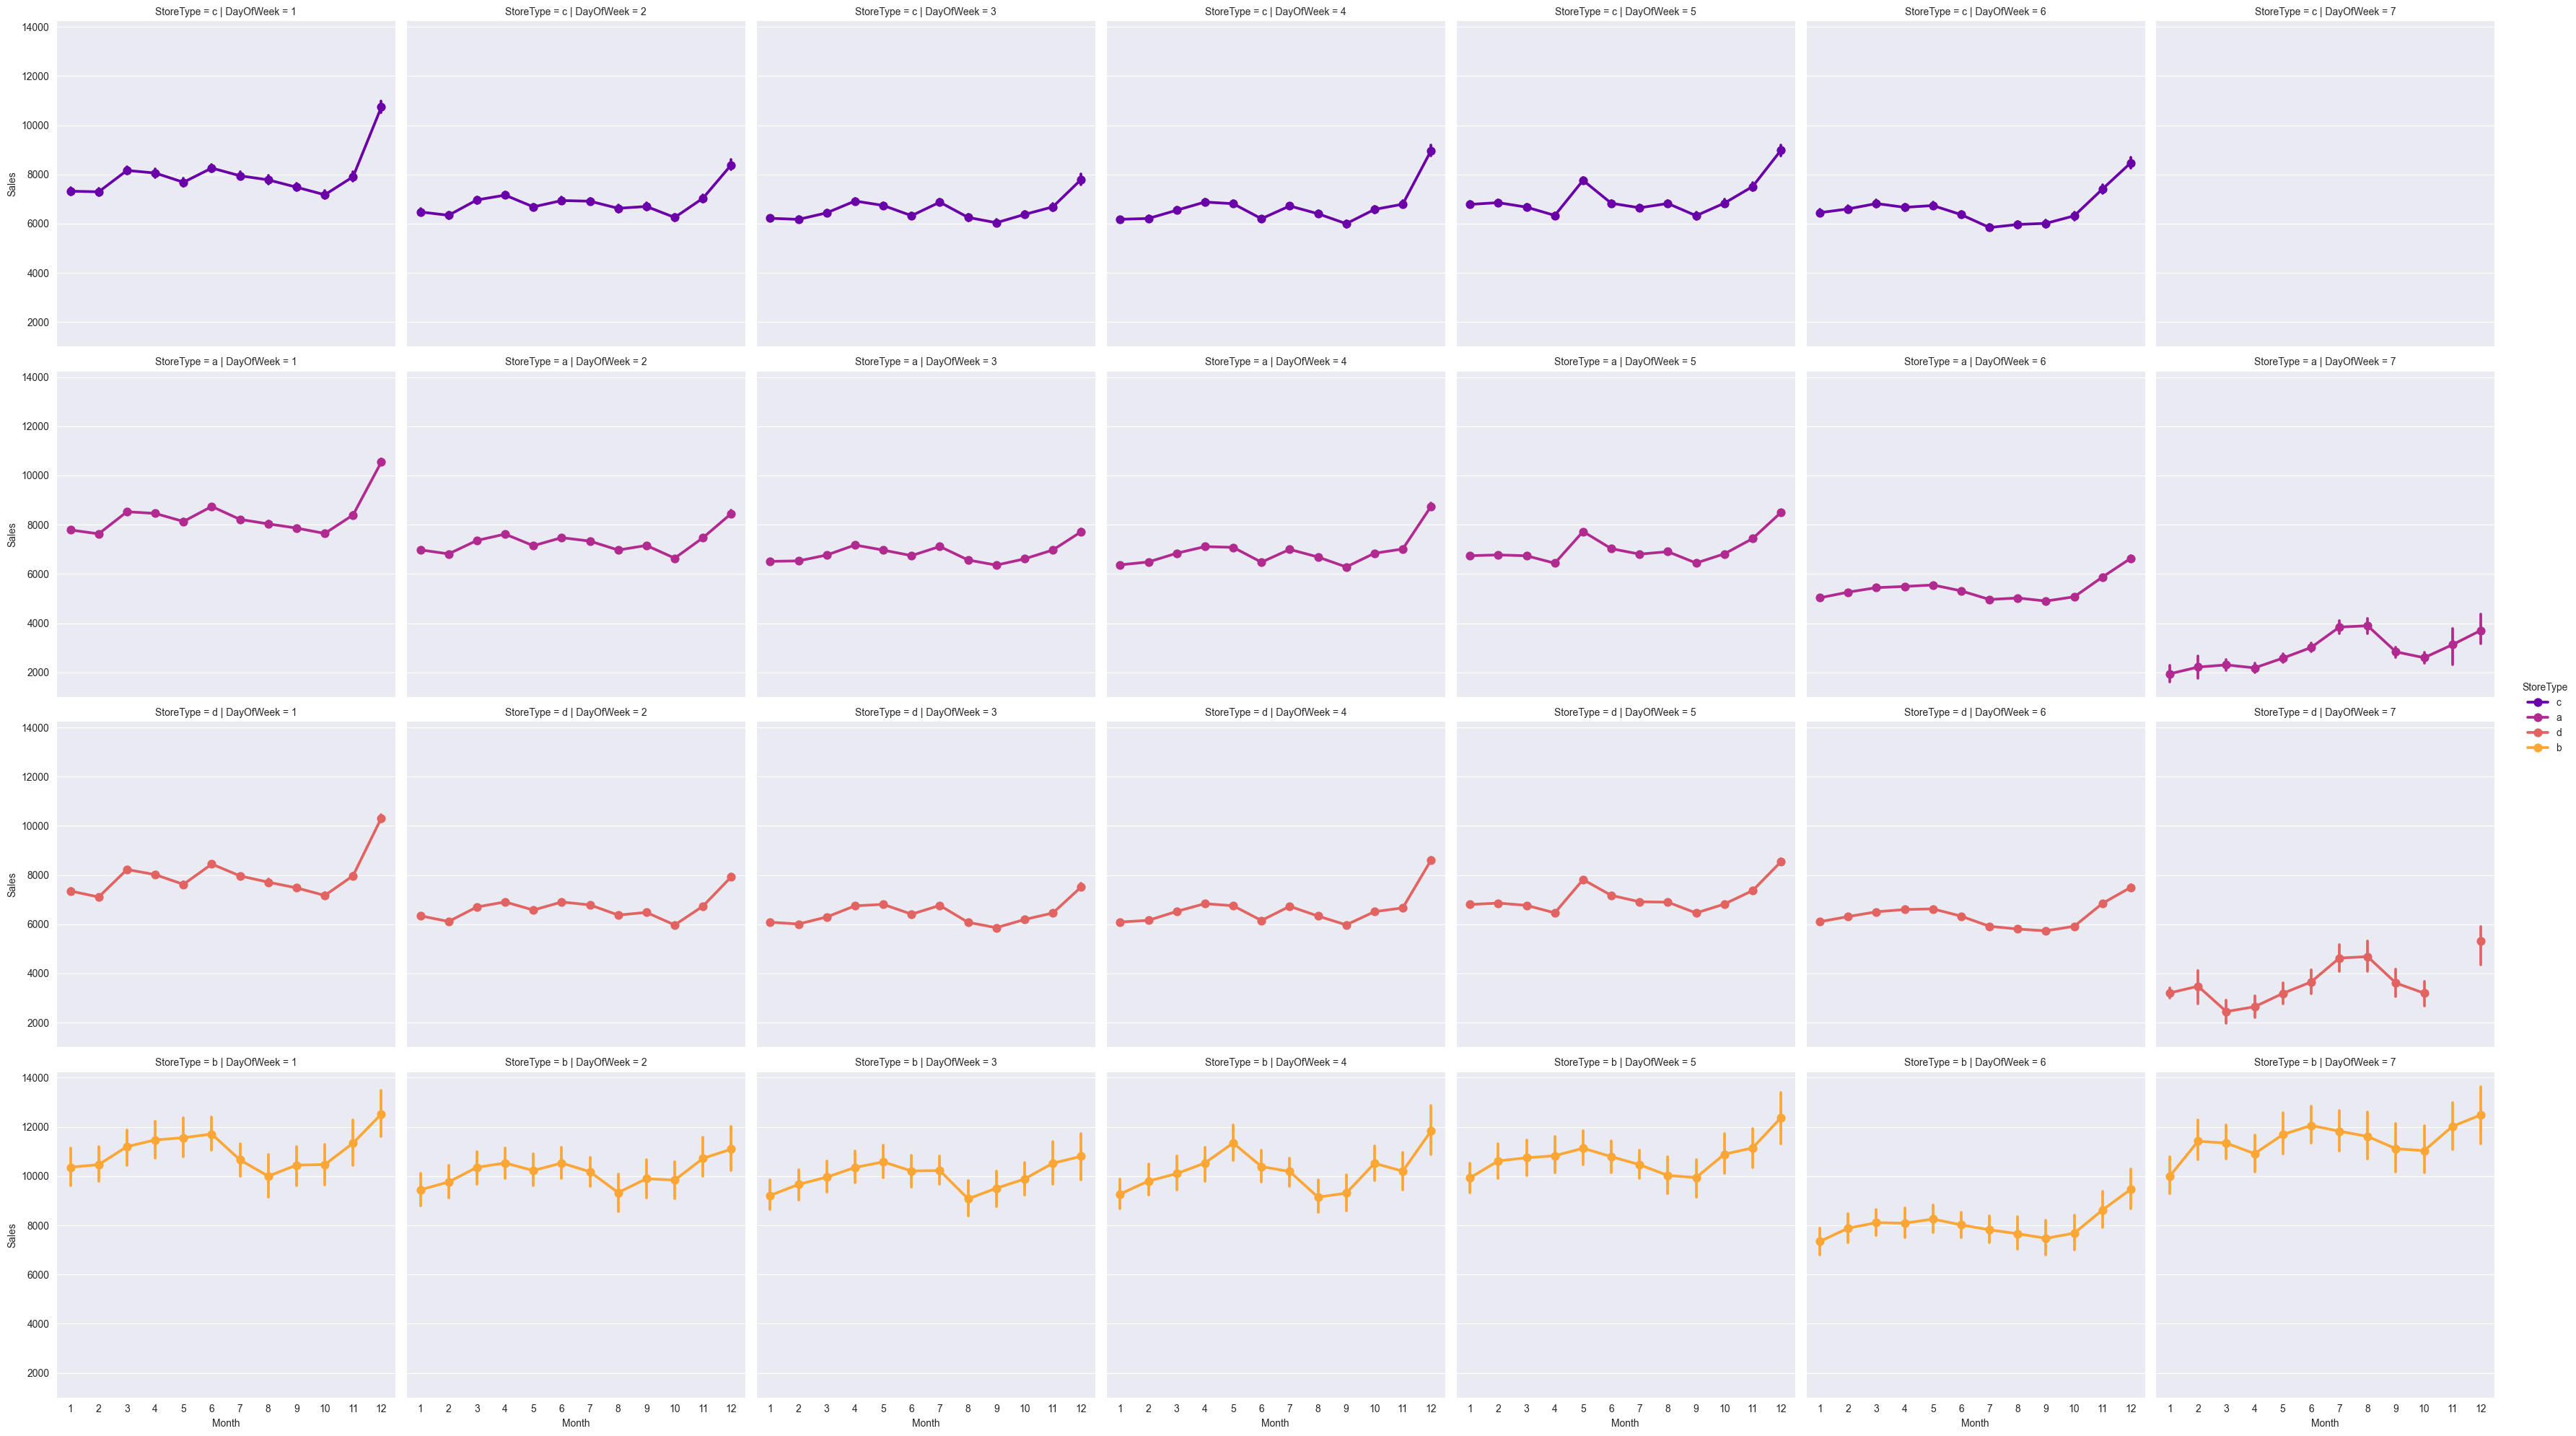

In [19]:
sns.catplot(
    data=train_store,
    x='Month',
    y='Sales',
    col='DayOfWeek',   # Separate plots by the day of the week
    palette='plasma',  # Use the plasma color palette
    hue='StoreType',   # Differentiate data points by StoreType
    row='StoreType',   # Separate plots by StoreType into different rows
    kind='point'       # Use point plot to show trends over time
)

We see that stores of StoreType C are all closed on Sundays, whereas others are most of the time opened. Interestingly enough, stores of StoreType D are closed on Sundays only from October to December.

Bt the way what are the stores which are opened on Sundays?

In [20]:
# stores which are opened on Sundays
train_store[(train_store.Open == 1) & (train_store.DayOfWeek == 7)]['Store'].unique()

array([  85,  122,  209,  259,  262,  274,  299,  310,  335,  353,  423,
        433,  453,  494,  512,  524,  530,  562,  578,  676,  682,  732,
        733,  769,  863,  867,  877,  931,  948, 1045, 1081, 1097, 1099],
      dtype=int64)

To complete our preliminary data analysis, we can add variables describing the period of time during which competition and promotion were opened:

In [25]:
train_store

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,...,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,CompetitionOpen
0,1,5,5263,555,1,1,0,1,2015,7,...,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,82.0
1,1,4,5020,546,1,1,0,1,2015,7,...,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,82.0
2,1,3,4782,523,1,1,0,1,2015,7,...,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,82.0
3,1,2,5011,560,1,1,0,1,2015,7,...,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,82.0
4,1,1,6102,612,1,1,0,1,2015,7,...,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,82.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844333,292,1,9291,1002,1,1,0,0,2013,1,...,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0,43.0
844334,292,6,2748,340,1,0,0,0,2013,1,...,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0,43.0
844335,292,5,4202,560,1,0,0,1,2013,1,...,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0,43.0
844336,292,4,4580,662,1,0,0,1,2013,1,...,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0,43.0


In [29]:

# competition open time (in months)
train_store['CompetitionOpen'] = 12 * (train_store.Year - train_store.CompetitionOpenSinceYear) + \
        (train_store.Month - train_store.CompetitionOpenSinceMonth)

# Promo open time
train_store['PromoOpen'] = 12 * (train_store.Year - train_store.Promo2SinceYear) + \
        (train_store.WeekofYear - train_store.Promo2SinceWeek) / 4.0

# replace NA's by 0
train_store.fillna(0, inplace = True)

# average PromoOpen time and CompetitionOpen time per store type
train_store.loc[:, ['StoreType', 'Sales', 'Customers', 'PromoOpen', 'CompetitionOpen']].groupby('StoreType').mean()

,Sales,Customers,PromoOpen,CompetitionOpen
StoreType,,,,
a,6925.697986,795.422370,12918.492198,7115.514452
b,10233.380141,2022.211825,17199.328069,11364.495244
c,6933.126425,815.538073,12158.636107,6745.418694
d,6822.300064,606.353935,10421.916846,9028.526526


The most selling and crowded StoreType A doesn't appear to be the one the most exposed to competitors. Instead it's a StoreType B, which also has the longest running period of promotion.

### Conclusion of EDA
- The most selling and crowded StoreType is A.
- The best "Sale per Customer" StoreType D indicates to the higher Buyer Cart. We could also assume that the stores of this types are situated in the rural areas, so that customers prefer buying more but less often.
- Low SalePerCustomer amount for StoreType B indicates to the possible fact that people shop there essentially for small things. - Which can also indicate to the label of this store type - "urban" - as it's more accessible for public, and customers don't mind shopping there from time to time during a week.
- Customers tends to buy more on Mondays when there's one promotion running (Promo) and on Sundays when there is no promotion at all (both Promo and Promo1 are equal to 0).
- Promo2 alone doesn't seem to be correlated to any significant change in the Sales amount.

# 2. Time Series Analysis

In [52]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf,pacf


In this section we will consider only one store from each store type(a, b, c, d).

In [53]:
pd.plotting.register_matplotlib_converters()

In [54]:
# Data Preparation: input should be float type

# our Sales data is int type so lets make it float
train['Sales'] = train['Sales'] * 1.00

train['Sales'].head()

Date
2015-07-31     5263.0
2015-07-31     6064.0
2015-07-31     8314.0
2015-07-31    13995.0
2015-07-31     4822.0
Name: Sales, dtype: float64

In [55]:
train.Store.unique()

array([   1,    2,    3, ..., 1115,  876,  292], dtype=int64)

<Axes: xlabel='Date'>

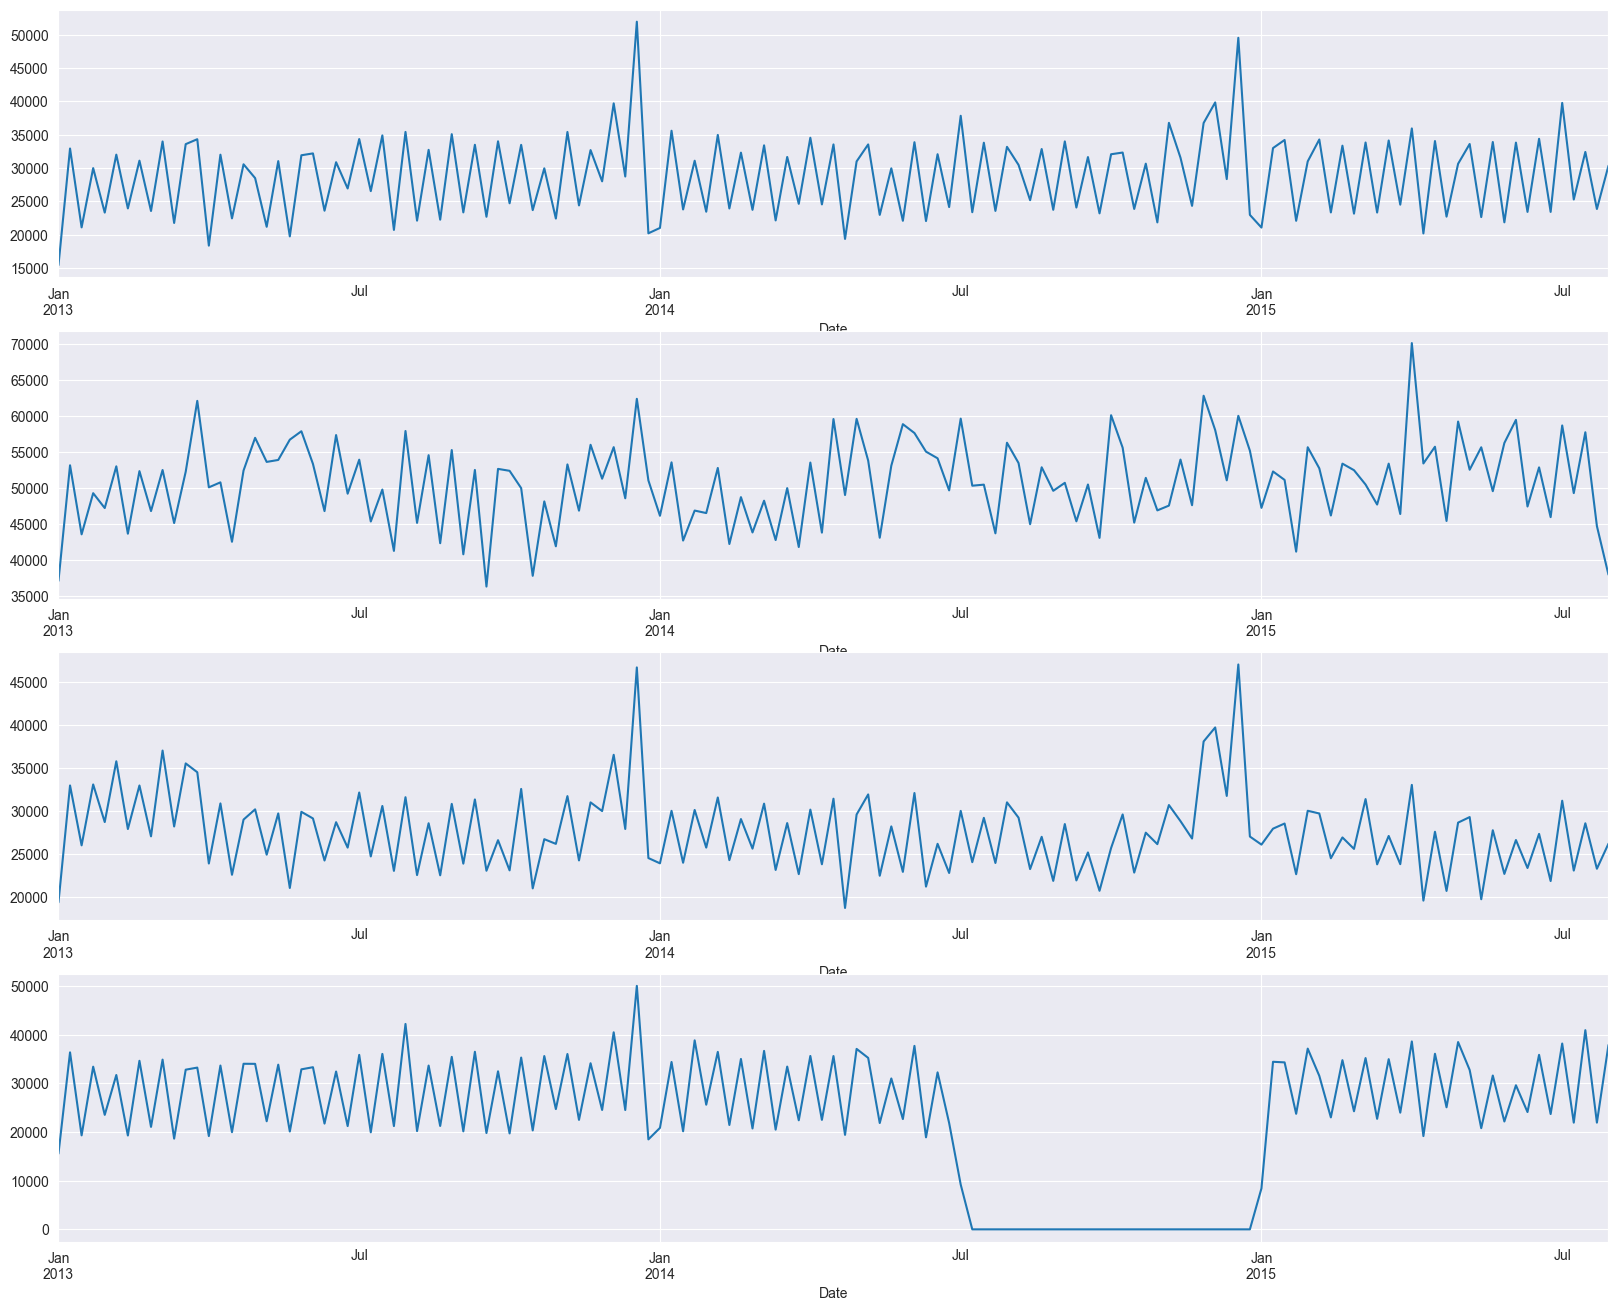

In [56]:
# Assigning one store from each category
sales_a = train[train.Store == 2]['Sales']
sales_b = train[train.Store == 85]['Sales'].sort_index(ascending = True)
sales_c = train[train.Store == 1]['Sales']
sales_d = train[train.Store == 13]['Sales']

frame, (ax1, ax2, ax3, ax4) = plt.subplots(4, figsize = (20, 16))

# Visualize Trend
sales_a.resample('w').sum().plot(ax = ax1)
sales_b.resample('w').sum().plot(ax = ax2)
sales_c.resample('w').sum().plot(ax = ax3)
sales_d.resample('w').sum().plot(ax = ax4)


# will be used to resample the speed column of our DataFrame
#The 'W' indicates we want to resample by week. At the bottom of this post is a summary of different time frames.
# You could use for Day = d, MOnth = m, Year = y

From the above chart we could see sales of store type A, C has highest sales at the end of the year. December months has christmas season. So, that they get highes salary. At the end of the month their sell decrease. We can not find semiler trend for store B and D, it could be there is no
data for that time perion. Possible reason is "store closed".

# stationarity of Time Seriese

Stationarity means that the statistical properties of a time series do not change over time. Some stationary data is (constant mean, constant variance and constant covariance with time).

### There are 2 ways to test the stationarity of time series
* A) Rolling Mean: Visualization
* B) Dicky - Fuller test: Statistical test

**A) Rolling Mean:** A rolling analysis of a time series model is often used to assess the model's stability over time. The window is rolled (slid across the data) on a weekly basis, in which the average is taken on a weekly basis. Rolling Statistics is a visualization test, where we can compare the original data with the rolled data and check if the data is stationary or not.

**B) Dicky -Fuller test:** This test provides us the statistical data such as p-value to understand whether we can reject the null hypothesis. If p-value is less than the critical value (say 0.5), we will reject the null hypothesis and say that data is stationary.

In [57]:
# lets create a functions to test the stationarity
def test_stationarity(timeseries):
    # Determine rolling statestics
    roll_mean = timeseries.rolling(window=7).mean()
    roll_std = timeseries.rolling(window=7).std()

    # plotting rolling statestics
    plt.subplots(figsize = (16, 6))
    orginal = plt.plot(timeseries.resample('w').mean(), color='blue',linewidth= 3, label='Orginal')
    roll_mean = plt.plot(roll_mean.resample('w').mean(), color='red',linewidth= 3, label='Rolling Mean')
    roll_mean = plt.plot(roll_std.resample('w').mean(), color='green',linewidth= 3, label='Rolling Std')

    plt.legend(loc='best')
    plt.show()

    # Performing Dickey-Fuller test
    print('Result of Dickey-Fuller test:')
    result= adfuller(timeseries, autolag='AIC')

    print('ADF Statestics: %f' %result[0])
    print('P-value: %f' %result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print(key, value)


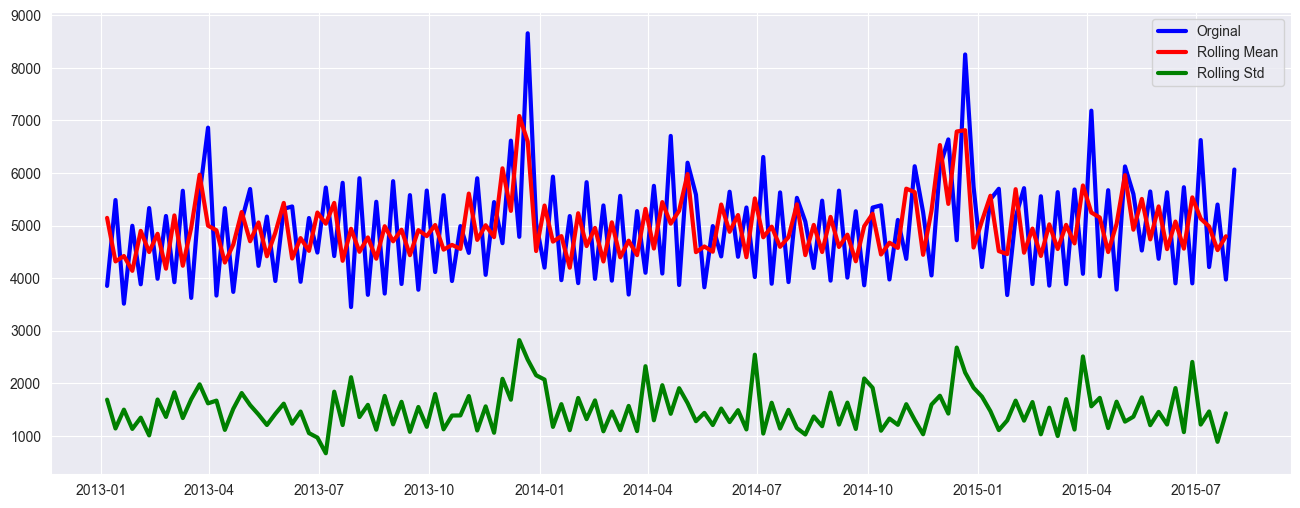

Result of Dickey-Fuller test:
ADF Statestics: -5.292708
P-value: 0.000006
Critical Values:
1% -3.438915730045254
5% -2.8653205426302253
10% -2.5687831424305845


In [58]:
test_stationarity(sales_a)

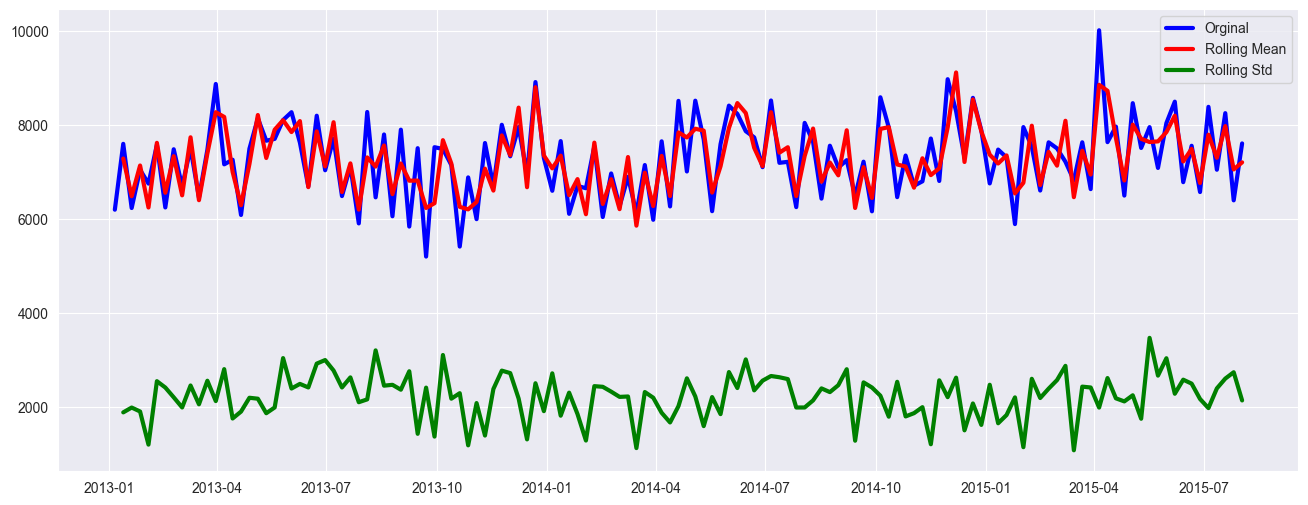

Result of Dickey-Fuller test:
ADF Statestics: -5.660918
P-value: 0.000001
Critical Values:
1% -3.437485646962348
5% -2.8646901138095378
10% -2.568447319459459


In [59]:
test_stationarity(sales_b)

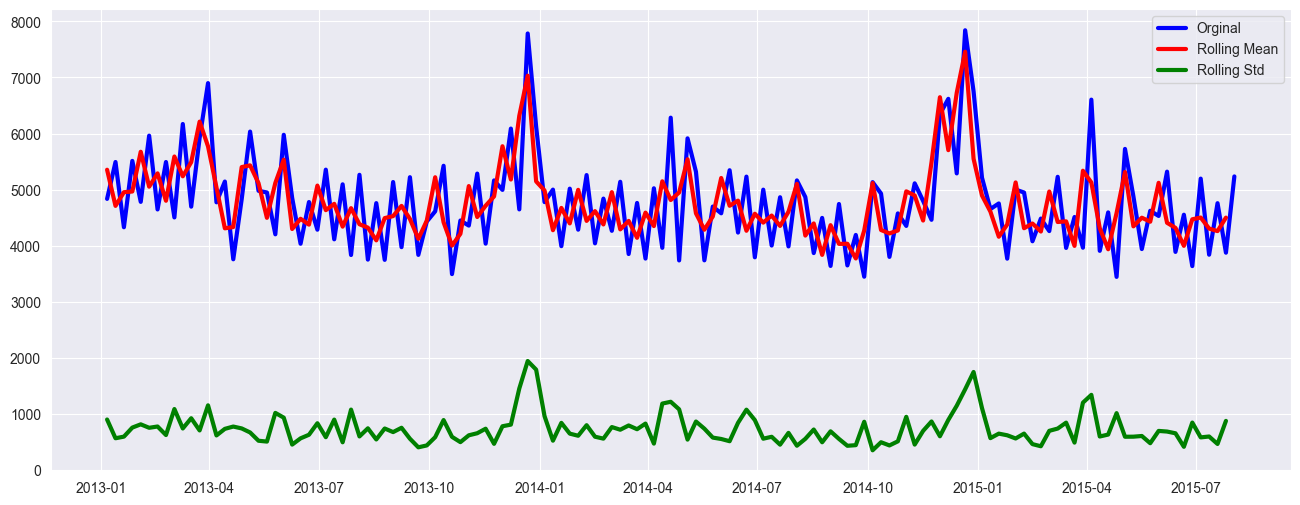

Result of Dickey-Fuller test:
ADF Statestics: -5.412786
P-value: 0.000003
Critical Values:
1% -3.4389045244994096
5% -2.8653156040031176
10% -2.5687805115003


In [60]:
test_stationarity(sales_c)

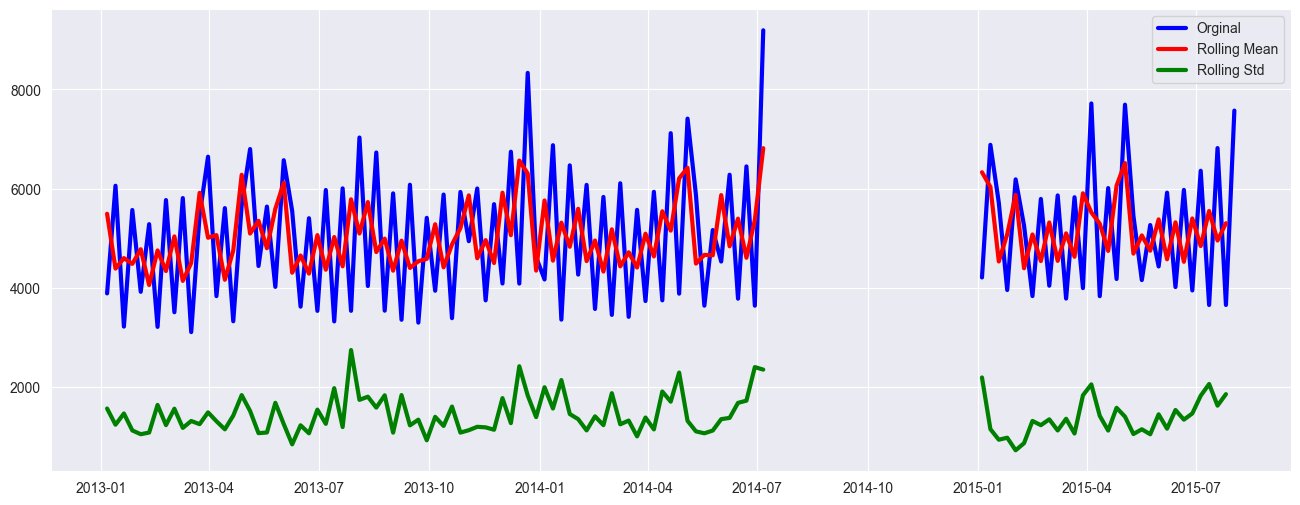

Result of Dickey-Fuller test:
ADF Statestics: -6.321001
P-value: 0.000000
Critical Values:
1% -3.4411511898545206
5% -2.866305414688104
10% -2.569307861950312


In [61]:
test_stationarity(sales_d)

# Lets create trends and seasonality

In [62]:
# plotting trends and seasonality

def plot_timeseries(sales,StoreType):

    fig, axes = plt.subplots(2, 1, sharex=True, sharey=False)
    fig.set_figheight(6)
    fig.set_figwidth(20)

    decomposition= seasonal_decompose(sales, model = 'additive',freq=365)

    estimated_trend = decomposition.trend
    estimated_seasonal = decomposition.seasonal
    estimated_residual = decomposition.resid

    axes[1].plot(estimated_seasonal, 'g', label='Seasonality')
    axes[1].legend(loc='upper left');

    axes[0].plot(estimated_trend, label='Trend')
    axes[0].legend(loc='upper left');

    plt.title('Decomposition Plots')

In [63]:
plot_timeseries(sales_a, 'a')
plot_timeseries(sales_b, 'b')
plot_timeseries(sales_c, 'c')
plot_timeseries(sales_d, 'd')


From the above plots, we can see that there is seasonality and trend present in our data. So, we'll use forecasting models that take both of these factors into consideration. For example, SARIMAX and Prophet.

# Time Series Forcusting

## Evaluation Matrics

**1. MAE - Mean Absolute Error:** It is the average of the absolute difference between the predicted values and observed values.
![](https://www.statisticshowto.com/wp-content/uploads/2016/10/MAE.png)

**2. RMSE - Root Mean Square Error:** It is the square root of the average of squared differences between the predicted values and observed values.
![](https://help.innovyze.com/download/attachments/2459040/scadawatch_analytical_function_rmse_formula.png?version=1&modificationDate=1555033531000&api=v2)

# Model 01: Seasonal Autoregressive Integrated Moving Average
In order to use this model, we need to first find out values of **p, d and q. p** represents number of Autoregressive terms - lags of dependent variable.
* q represents number of Moving Average terms
* lagged forecast errors in prediction equation.
* d represents number of non-seasonal differences.

**To find the values of p, d and q - we use Autocorrelation function (ACF) and Partial Autocorrelation (PACF) plots.**

**ACF** measure of correlation between time series with a lagged version of itself.
**PACF** measure of correlation between time series with a lagged version of itself but after eliminating the variations already explained by the intervening comparison.

**p value** is the value on x-axis of PACF where the plot crosses the upper Confidence Interval for the first time.

**q value** is the value on x-axis of ACF where the plot crosses the upper Confidence Interval for the first time.


### Autocorrelation function to make ACF and PACF

In [ ]:
def auto_corr(sales):
    lag_acf = acf(sales, nlags=30)
    lag_pacf = pacf(sales,nlags=20,method='ols')

    plt.subplot(121)
    plt.plot(lag_acf)
    plt.axhline(y=0, linestyle='--', color='red')
    plt.axhline(y=1.96/np.sqrt(len(sales_a)), linestyle='--', color='red')
    plt.axhline(y=-1.96/np.sqrt(len(sales_a)), linestyle='--', color='red')
    plt.title('ACF')

    plt.subplot(122)
    plt.plot(lag_pacf)
    plt.axhline(y=0, linestyle='--', color='red')
    plt.axhline(y=1.96/np.sqrt(len(sales_a)), linestyle='--', color='red')
    plt.axhline(y=-1.96/np.sqrt(len(sales_a)), linestyle='--', color='red')
    plt.title('PACF')


In [ ]:
# ACF and PCF for store A
auto_corr(sales_a)

In [ ]:
# ACF and PCF for store B
auto_corr(sales_b)

In [ ]:
# ACF and PCF for store C
auto_corr(sales_c)

In [ ]:
# ACF and PCF for store D
auto_corr(sales_d)

The above graphs suggest that the p = 2 and q = 2 but let's do a grid search and see which combination of p, q and d gives the lowest Akaike information criterion (**AIC**, which tells us the quality of statistical models for a given set of data. Best model uses the lowest number of features to fit the data.

If we are to predict the sales of each store, we need to consider the whole data set rather than one store of each category. We took one store of each category to understand the tiem series data but from now on, we'll use the whole dataset for modelling

In [ ]:
# Summering sales on per week basis
# ARIMA = Autoregresive Integrated Moving Average


train_arima = train.resample('w').mean()
train_arima = train_arima[['Sales']]
train_arima.plot()

In [ ]:
train_arima.head()

### Hyperparamter turing ARIMA model
As discussed above, we have three parameters (p, d and q) for SARIMA model. So, in order to choose the best combination of these parameter, we'll use a grid search. The best combination of parameters will give the lowest AIC score.

In [ ]:
# Define the p, d and q parameters to take any value between 0 and 3
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA: ')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

let's iterate through these combinations to see which one gives the lowest AIC score.

In [ ]:
# Determing p,d,q combinations with AIC scores.
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(train_arima,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

So, we can see that, the above grid search result our optimal paramiter (ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:1807.3489408440882)

### Fitting the model

In [ ]:
# Fitting the data to SARIMA model
model_sarima = sm.tsa.statespace.SARIMAX(train_arima,
                                        order=(1, 1, 1),
                                        seasonal_order=(1,1,1,12),
                                        enforce_stationarity=False,
                                        enforce_invertibility=False)
results_sarima= model_sarima.fit()
print(results_sarima.summary().tables[1])

In [ ]:
# Checking diagnostic plots
results_sarima.plot_diagnostics(figsize=(16, 10))
plt.show()

We can see from the above 'Histogram plus estimated density' plot that our KDE (Kernel Desnity Estimator) plot closely follows the N(0,1) normal distribution plot. The Normal Q-Q plot shows that the ordered distribution of residuals follows the distribution similar to normal distribution. Thus, our model seems to be pretty good.

**Standardized residual plot tells us that there is no major seasonality trend, which is confirmed by Correlogram (autocorrelation) plot. Autocorrelation plot tells us that the time series residuals have low correlation with lagged versions of itself**

In [ ]:
# Model prediction

pred = results_sarima.get_prediction(start=pd.to_datetime('2015-1-4'), dynamic=False)

# Get confidence interval of forecast
pred_ci = pred.conf_int()

ax = train_arima['2014':].plot(label='Observed', figsize=(15,7))
pred.predicted_mean.plot(ax=ax, label='One step ahed Forecast', alpha=1)

ax.fill_between(pred_ci.index,
               pred_ci.iloc[:, 0],
               pred_ci.iloc[:,1],
               color='r', alpha=.1)

ax.set_xlabel('Date')
ax.set_ylabel('Sales')
plt.legend()
plt.show()

train_arima_forecasted = pred.predicted_mean
train_arima_truth = train_arima['2015-01-04':]

rms_arima= sqrt(mean_squared_error(train_arima_truth,train_arima_forecasted))
print('Root Mean Squared Error = ',rms_arima)

In [ ]:
# Save your predicted results for future validation.
# You could find this results in output sections

train_arima_forecasted.to_csv('predicted_data.csv')
print('Predicted Data Saved in output')